In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [5]:
# !pip install scikit-learn-extra

In [6]:
# from sklearn_extra.cluster import KMedoids
# from scipy.stats import wasserstein_distance

In [7]:
df = pd.read_csv('C:/Users/MANCY036/Downloads/Eskwelabs/consolidated_csv_03TIWI_A.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Maximum Capacity from a different dict?

# Clean Time-stamp
(next time)

# Drop columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233797 entries, 0 to 233796
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RUN_TIME            233797 non-null  object 
 1   MKT_TYPE            233797 non-null  object 
 2   REGION_NAME         233797 non-null  object 
 3   ZONE_NAME           233797 non-null  object 
 4   RESOURCE_NAME       233797 non-null  object 
 5   TIME_INTERVAL       233797 non-null  object 
 6   START_TIME          233797 non-null  object 
 7   END_TIME            233797 non-null  object 
 8   MP_NAME             229225 non-null  object 
 9   PRICE1              233797 non-null  float64
 10  QUANTITY1           233797 non-null  float64
 11  PRICE2              233797 non-null  float64
 12  QUANTITY2           233797 non-null  float64
 13  PRICE3              232545 non-null  float64
 14  QUANTITY3           232545 non-null  float64
 15  PRICE4              997 non-null  

In [9]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [10]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233792,09/25/2023 11:35:00 PM,-10000.0,-10000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233793,09/25/2023 11:40:00 PM,-10000.0,-10000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233794,09/25/2023 11:45:00 PM,-10000.0,-10000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233795,09/25/2023 11:50:00 PM,-10000.0,-10000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[selected_columns].describe()

,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,PRICE10,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
count,233797.000000,233797.000000,232545.000000,997.000000,24.0,0.0,0.0,0.0,0.0,0.0,...,233797.000000,232545.000000,997.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,-9996.449912,-9996.449912,-536.425720,3649.831494,4000.0,NaN,NaN,NaN,NaN,NaN,...,7.558118,19.227317,16.759278,16.0,NaN,NaN,NaN,NaN,NaN,NaN
std,188.383736,188.383736,561.974162,1899.506909,0.0,NaN,NaN,NaN,NaN,NaN,...,2.942491,3.542946,1.790825,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,-10000.000000,-10000.000000,-5030.000000,-1.000000,4000.0,NaN,NaN,NaN,NaN,NaN,...,3.000000,8.000000,15.000000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,-10000.000000,-10000.000000,-1030.000000,4000.000000,4000.0,NaN,NaN,NaN,NaN,NaN,...,5.000000,17.000000,16.000000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,-10000.000000,-10000.000000,-1030.000000,4000.000000,4000.0,NaN,NaN,NaN,NaN,NaN,...,7.200000,19.000000,16.000000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,-10000.000000,-10000.000000,-1.000000,5000.000000,4000.0,NaN,NaN,NaN,NaN,NaN,...,7.200000,21.000000,16.000000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
max,0.000000,0.000000,4000.000000,5000.000000,4000.0,NaN,NaN,NaN,NaN,NaN,...,17.000000,32.000000,22.000000,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

# FFill NaNs with last Price-Quantity Bid

In [13]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

## TAKES 30 SECONDS TO RUN
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233792,09/25/2023 11:35:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233793,09/25/2023 11:40:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233794,09/25/2023 11:45:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233795,09/25/2023 11:50:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [14]:
result_df['run_time'] = result_df['run_time'].astype(str)

C:\Users\MANCY036\AppData\Local\Temp\ipykernel_1008\2012798107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = result_df['run_time'].astype(str)


In [15]:
df_2022 = result_df[result_df['run_time'].str[6:10]=='2022']
df_2022.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
53195,01/01/2022,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53196,01/01/2022 12:05:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53197,01/01/2022 12:10:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53198,01/01/2022 12:15:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53199,01/01/2022 12:20:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0


In [16]:
df_2022.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,69711.0,69711.0,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,...,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000,69711.000000
mean,-10000.0,-10000.0,-786.220568,-786.093773,-786.093773,-786.093773,-786.093773,-786.093773,-786.093773,-786.093773,...,6.354283,19.743627,19.750585,19.750585,19.750585,19.750585,19.750585,19.750585,19.750585,19.750585
std,0.0,0.0,597.155893,597.306857,597.306857,597.306857,597.306857,597.306857,597.306857,597.306857,...,2.363860,3.951231,3.948591,3.948591,3.948591,3.948591,3.948591,3.948591,3.948591,3.948591
min,-10000.0,-10000.0,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
25%,-10000.0,-10000.0,-1060.000000,-1060.000000,-1060.000000,-1060.000000,-1060.000000,-1060.000000,-1060.000000,-1060.000000,...,5.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
50%,-10000.0,-10000.0,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,...,5.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
75%,-10000.0,-10000.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,7.200000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
max,-10000.0,-10000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000


In [17]:
# Assuming df is your DataFrame with price-quantity pairs in each row
test_df = df_2022

# Create empty lists to store data for all stepwise curves
all_quantities = []
all_prices = []
all_intp_quantities = []
all_intp_prices = []

# Iterate through each row
for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc='Processing rows'):
    # Extract price and quantity columns for the current row
    prices = row.filter(like='price')
    quantities = row.filter(like='quantity')

    # Sort data by quantity
    sorted_data = sorted(zip(quantities, prices))
    quantities, prices = zip(*sorted_data)

    # Interpolate prices for regular quantity intervals
    step_fx = interp1d(quantities, prices, kind='previous', fill_value='extrapolate')
    step = df_2022['quantity11'].max() / 10

    # Create a finer quantity range for interpolation
    intp_quantities = np.arange(df_2022['quantity1'].min(), df_2022['quantity11'].max() + 1, step)
    
    # Get interpolated prices
    intp_prices = step_fx(intp_quantities)
    
    # Set a condition to handle quantities beyond the maximum in the raw data
    max_quantity_interval = max(quantities)
    intp_prices[intp_quantities > max_quantity_interval] = 33000
    
    # Append data to lists
    all_quantities.append(quantities)
    all_prices.append(prices)
    all_intp_quantities.append(intp_quantities)
    all_intp_prices.append(intp_prices)

Processing rows: 100%|██████████| 69711/69711 [02:07<00:00, 546.06it/s]


In [18]:
# # Plot all stepwise curves on a single graph
# plt.figure(figsize=(10, 6))

# for quantities, prices, intp_quantities, intp_prices in tqdm(zip(all_quantities, all_prices, all_intp_quantities, all_intp_prices), total=len(all_quantities), desc='Processing'):
#     plt.step(quantities, prices, where='post')
#     plt.scatter(intp_quantities, intp_prices, color='red')

# # Customize the plot as needed
# plt.xlabel('Quantity')
# plt.ylabel('Price')
# plt.title('Stepwise Graphs and Interpolated Prices for All Rows')
# plt.show()

In [19]:
# Convert the interpolated prices into price series
price_series = np.array(all_intp_prices)
price_series

array([[-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       ...,
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.]])

In [20]:
# ! pip install kneed

In [21]:
# ! pip install yellowbrick

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.manifold import TSNE

from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,  davies_bouldin_score
from scipy.spatial.distance import cdist
from kneed import KneeLocator

from tqdm import tqdm

In [23]:
# Create a DataFrame with the original data and cluster labels
price_series_df = pd.DataFrame(price_series, columns=[f'Feature_{i+1}' for i in range(price_series.shape[1])])

In [24]:
price_series_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11
0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
1,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
2,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
3,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0
4,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,33000.0,33000.0,33000.0,33000.0,33000.0


In [27]:
wcss = {} ## Within-Cluster Sum of Square
ssc = {}
calinski_score = {}
davies_score = {}
K = range(2,9)

for k in tqdm(K, desc='Clustering Progress'):
    #Building and fitting the model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(price_series_df)
    kmeans_model.fit(price_series_df)

    wcss[k] = kmeans_model.inertia_ ### sum of squared distances to closest cluster center
    ssc[k] = silhouette_score(price_series_df, kmeans_model.labels_, metric='euclidean')
    davies_score[k] = davies_bouldin_score(price_series_df, kmeans_model.labels_)

Clustering Progress: 100%|██████████| 7/7 [10:19<00:00, 88.56s/it]


C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

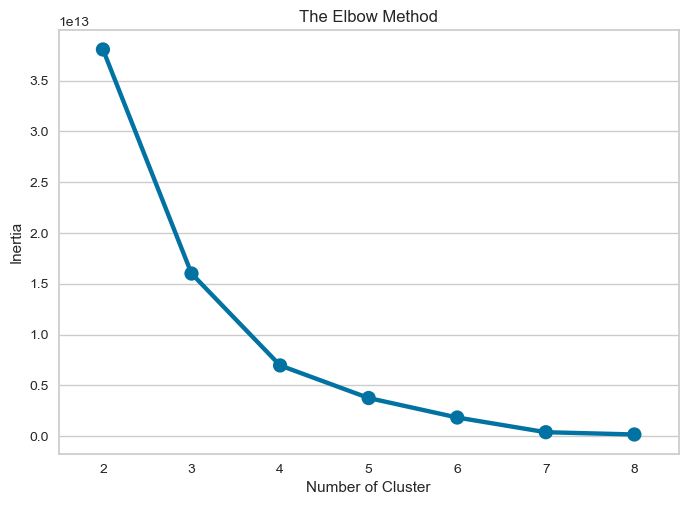

In [28]:
# Check results of elbow method

plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [29]:
# Locate the knee or elbow
cost_kneed = KneeLocator(x = K , y = list(wcss.values()) , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
suggested_cluster = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(suggested_cluster))

Elbow at k = 4 clusters


C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

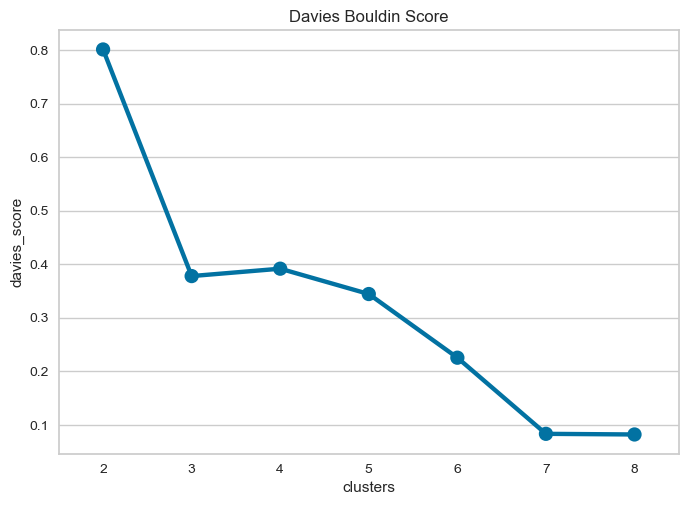

In [30]:
# Create plot for Davies-Bouldin score

plt.title('Davies Bouldin Score')
plt.xlabel('clusters')
plt.ylabel('davies_score')
sns.pointplot(x=list(davies_score.keys()), y=list(davies_score.values()))
plt.show()

C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

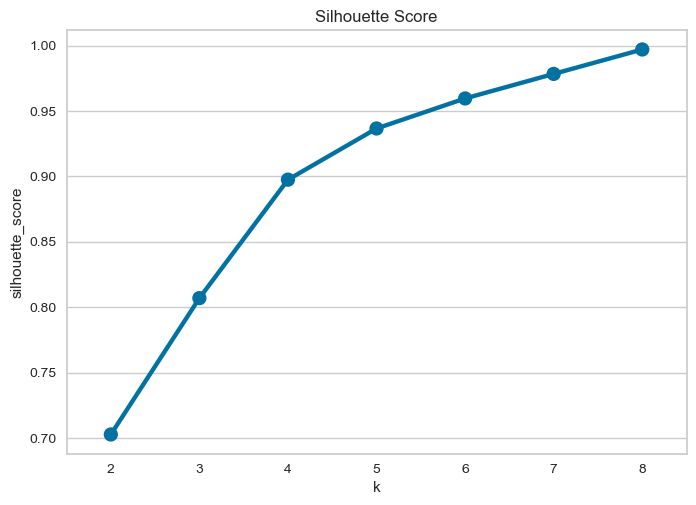

In [31]:
# Create plot for silhouette score

plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('silhouette_score')
sns.pointplot(x=list(ssc.keys()), y=list(ssc.values()))
plt.show()

In [77]:
# Create function for silhouette plot

def silhouette_plot(X , n_list):
    silhouette_scores = []
    for k in tqdm(n_list, desc='Progress'):
        #Instantiate model in k clusters
        model = KMeans(n_clusters = k, random_state=42, n_init=10)
        #Instantiate Visualizer model of with k clusters
        visualizer = SilhouetteVisualizer(model)
        #Fit data to the model
        visualizer.fit(X)
        #Draw data
        visualizer.poof()
        #Append score
        silhouette_scores.append([visualizer.silhouette_score_ , k])
    return silhouette_scores

Progress:   0%|          | 0/1 [00:00<?, ?it/s]

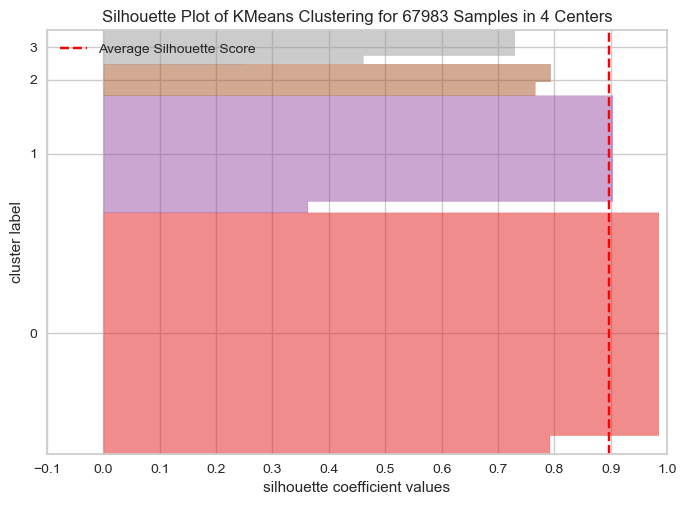

Progress: 100%|██████████| 1/1 [03:23<00:00, 204.00s/it]


[[0.8978014812667686, 4]]

In [84]:
# Create silhouette plot

k_cluster_test = [4]

silhouette_plot(price_series_df , k_cluster_test)

In [33]:
# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 4

# Initialize K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(price_series)

# Get cluster labels
cluster_labels = kmeans.labels_
cluster_labels = cluster_labels + 1

# Now, cluster_labels contains the assigned cluster for each row
# You can use these labels for further analysis or visualization


C:\Users\MANCY036\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
# Declare your own custom palette with 7 colors
custom_palette = ["#227c9d", "#48cfae", "#4fc0e8", "#fe6d73", "#ffcb77", "#ff66c4"]

# Use the custom palette with only the first 5 colors
cluster_palette = sns.color_palette(custom_palette[:n_clusters])

C:\Users\MANCY036\AppData\Local\Temp\ipykernel_1008\482655777.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None, palette=cluster_palette)
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

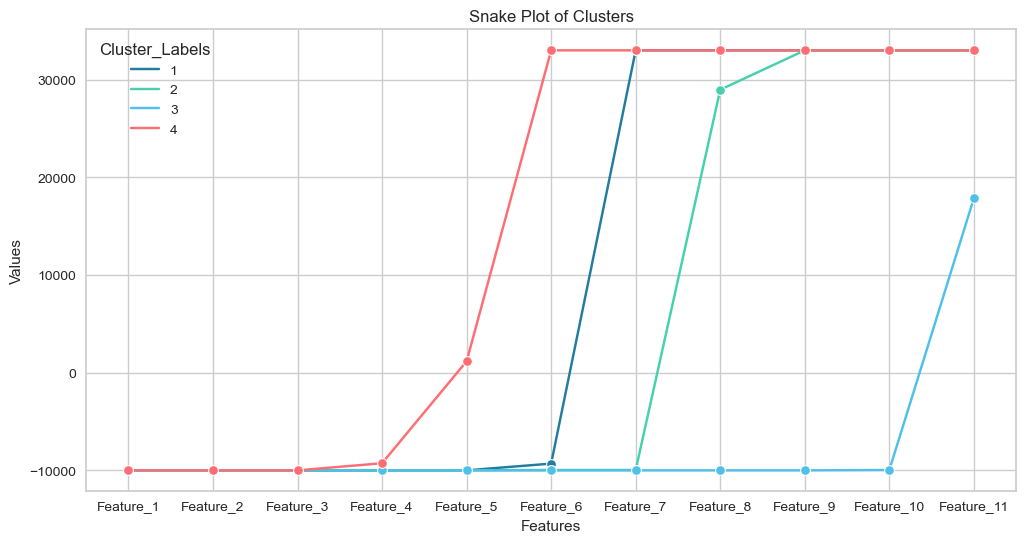

In [35]:
price_series_df['Cluster_Labels'] = cluster_labels

# Melt the DataFrame for the snake plot
df_melted = pd.melt(price_series_df, id_vars='Cluster_Labels', value_vars=price_series_df.columns[:-1])

# Create a snake plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None, palette=cluster_palette)
plt.title('Snake Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

<Axes: title={'center': 'Flattened Graph of 4 Clusters'}>

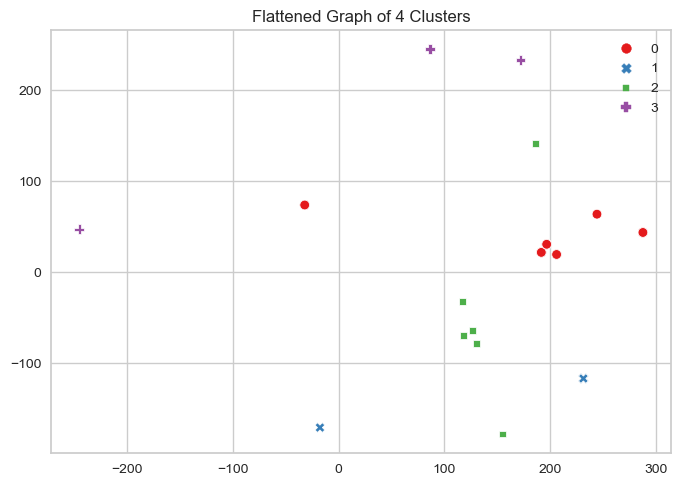

In [87]:
# # Initialise TSNE
# model = TSNE(random_state=1)
# transformed = model.fit_transform(price_series_df)

# # Plot t-SNE
# plt.title('Flattened Graph of {} Clusters'.format(n_clusters))
# sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MANCY036\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

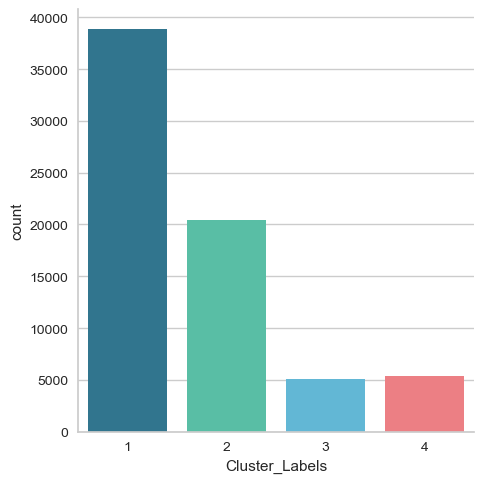

In [36]:
sns.catplot(
    data=price_series_df,
    x="Cluster_Labels",
    kind="count",
    palette=cluster_palette
)
plt.show()

### Create a separate time distribution dataframe

In [37]:
time_distribution = df_2022.copy()

In [38]:
time_distribution.reset_index(drop=True, inplace=True)
time_distribution.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,01/01/2022,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
1,01/01/2022 12:05:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
2,01/01/2022 12:10:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
3,01/01/2022 12:15:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
4,01/01/2022 12:20:00 AM,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0


In [39]:
time_distribution = time_distribution[['run_time', 'price1']]
time_distribution.head()

,run_time,price1
0,01/01/2022,-10000.0
1,01/01/2022 12:05:00 AM,-10000.0
2,01/01/2022 12:10:00 AM,-10000.0
3,01/01/2022 12:15:00 AM,-10000.0
4,01/01/2022 12:20:00 AM,-10000.0


In [40]:
# Assuming df is your DataFrame
split_values = time_distribution['run_time'].str.split(' ', n=1, expand=True)
time_distribution['date'] = split_values[0]
time_distribution['time'] = split_values[1].fillna('12:00:00 AM')
time_distribution.head()

,run_time,price1,date,time
0,01/01/2022,-10000.0,01/01/2022,12:00:00 AM
1,01/01/2022 12:05:00 AM,-10000.0,01/01/2022,12:05:00 AM
2,01/01/2022 12:10:00 AM,-10000.0,01/01/2022,12:10:00 AM
3,01/01/2022 12:15:00 AM,-10000.0,01/01/2022,12:15:00 AM
4,01/01/2022 12:20:00 AM,-10000.0,01/01/2022,12:20:00 AM


In [41]:
time_distribution = time_distribution.drop(columns = ['run_time', 'price1'])
time_distribution.head()

,date,time
0,01/01/2022,12:00:00 AM
1,01/01/2022,12:05:00 AM
2,01/01/2022,12:10:00 AM
3,01/01/2022,12:15:00 AM
4,01/01/2022,12:20:00 AM


In [42]:
time_distribution['cluster_labels'] = cluster_labels
time_distribution.head()

,date,time,cluster_labels
0,01/01/2022,12:00:00 AM,1
1,01/01/2022,12:05:00 AM,1
2,01/01/2022,12:10:00 AM,1
3,01/01/2022,12:15:00 AM,1
4,01/01/2022,12:20:00 AM,1


In [43]:
#time_distribution['date'] = pd.to_datetime(time_distribution['date'])
#-- didn't push through with converting the date column to datetime kasi for some reason nawawala yung ibang months (see above block)

time_distribution['time'] = pd.to_datetime(time_distribution['time'], format='%I:%M:%S %p')
time_distribution['time'] = time_distribution['time'].dt.time

time_distribution.head()

,date,time,cluster_labels
0,01/01/2022,00:00:00,1
1,01/01/2022,00:05:00,1
2,01/01/2022,00:10:00,1
3,01/01/2022,00:15:00,1
4,01/01/2022,00:20:00,1


In [44]:
time_distribution['date'] = pd.to_datetime(time_distribution['date'])
time_distribution['date'].value_counts()

date
2022-12-20    318
2022-01-01    288
2022-07-15    288
2022-06-06    288
2022-06-07    288
             ... 
2022-02-15    263
2022-10-29    216
2022-05-26    182
2022-05-25    173
2022-03-11    130
Name: count, Length: 244, dtype: int64

In [45]:
time_distribution['month_year'] = time_distribution['date'].dt.to_period('M')
time_distribution['month_year'].value_counts()

month_year
2022-01    8912
2022-03    8747
2022-05    8689
2022-02    8030
2022-04    7196
2022-12    6366
2022-10    6243
2022-07    6046
2022-11    6028
2022-06    3454
Freq: M, Name: count, dtype: int64

In [46]:
# Convert time into number of minutes since 0:00:00
time_distribution['time'] = time_distribution['time'].astype(str)
time_distribution['time'] = pd.to_datetime(time_distribution['time'], format='%H:%M:%S').dt.time
time_distribution['time_minutes'] = time_distribution['time'].apply(lambda x: x.hour * 60 + x.minute)

C:\Users\MANCY036\AppData\Local\Temp\ipykernel_1008\349510965.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


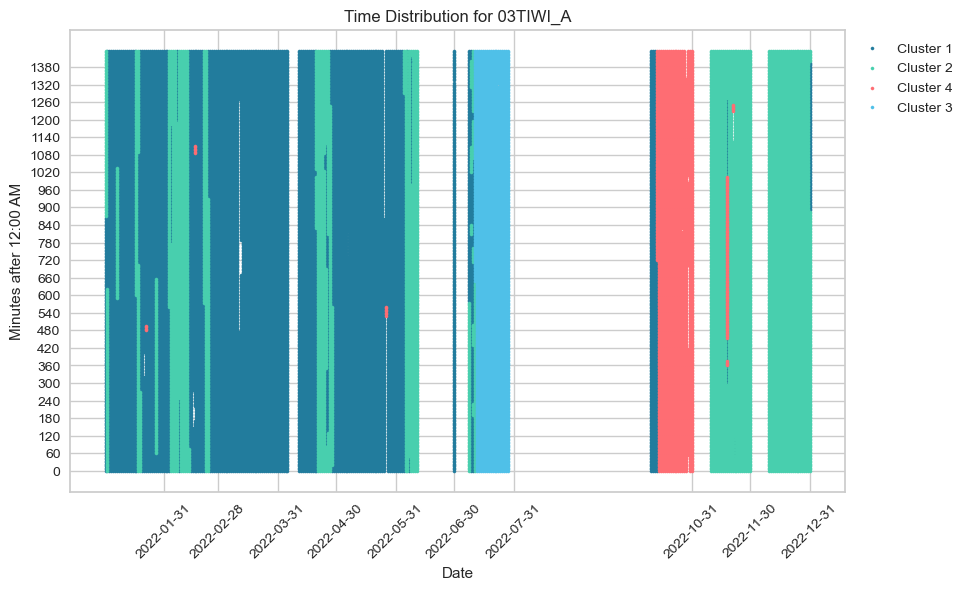

In [48]:
# Plot scatter plot with specified color palette
plt.figure(figsize=(10, 6))

unique_cluster_labels = time_distribution['cluster_labels'].unique()

for cluster_labels in unique_cluster_labels:
    cluster_data = time_distribution[time_distribution['cluster_labels'] == cluster_labels]
    
    # Adjust cluster_labels indexing to start from 0
    cluster_labels -= 1
    
    plt.scatter(
        cluster_data['date'],
        cluster_data['time_minutes'],
        label=f'Cluster {cluster_labels + 1}',  # Adjust label display
        s=5,
        c=cluster_palette[cluster_labels % len(cluster_palette)]
    )

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Minutes after 12:00 AM')
plt.title('Time Distribution for 03TIWI_A') # remember to change powerplant name

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

x_ticks = time_distribution['month_year'].unique()  
y_ticks = time_distribution['time_minutes'].unique()[::12]  
plt.xticks(x_ticks, rotation=45)
plt.yticks(y_ticks)

# Show the plot
plt.show()

# K-Medoids

In [44]:
price_series

array([[-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       ...,
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.]])

In [45]:
price_series_df = pd.DataFrame(price_series)

In [46]:
price_series_df.to_csv('price_series_csv_03TIWI_A.csv', index=False, header=False)

In [47]:
price_series_df.to_csv('price_series_csv_03TIWI_A_labelled.csv')

In [28]:
len(price_series)

67983

In [30]:
# Reshape the curves for K-medoids clustering
curves_reshaped = price_series.reshape(747813, -1)

In [31]:
curves_reshaped

array([[-10000.],
       [-10000.],
       [-10000.],
       ...,
       [ 33000.],
       [ 33000.],
       [ 33000.]])

In [32]:
print(curves_reshaped.shape)

(747813, 1)


In [33]:
# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 3

# Function to calculate the Wasserstein distance between two curves
def curve_distance(curve1, curve2):
    curve1_flat = curve1.flatten()
    curve2_flat = curve2.flatten()
    distance = wasserstein_distance(curve1_flat, curve2_flat)
    return distance

# Initialize K-medoids model with Wasserstein distance metric
kmedoids = KMedoids(n_clusters=n_clusters, metric=curve_distance)

# Fit the model to the data
kmedoids.fit(curves_reshaped)

# Get cluster labels and cluster medoids
cluster_labels = kmedoids.labels_
cluster_medoids = kmedoids.cluster_centers_

# Visualize the clustering results (for simplicity, plotting only first two dimensions)
plt.scatter(curves_reshaped[:, 0], curves_reshaped[:, 1], c=cluster_labels, cmap='viridis')
#plt.scatter(cluster_medoids[:, 0], cluster_medoids[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.legend()
plt.title('K-medoids Clustering of Cumulative Step-wise Curves using Wasserstein Distance')
plt.show()


MemoryError: Unable to allocate 4.07 TiB for an array with shape (747813, 747813) and data type float64

In [34]:
from sklearn.cluster import KMeans

# Assuming all_intp_prices_array is the array of interpolated prices

# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 3

# Initialize K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(price_series)

# Get cluster labels
cluster_labels = kmeans.labels_

# Now, cluster_labels contains the assigned cluster for each row
# You can use these labels for further analysis or visualization

C:\Users\ejanv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Normalization

In [35]:
result_df.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,...,155754.000000,155754.00000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000,155754.000000
mean,-9994.671084,-9994.671084,-875.309308,-858.526433,-858.064165,-858.064165,-858.064165,-858.064165,-858.064165,-858.064165,...,7.737559,18.43847,18.457314,18.457468,18.457468,18.457468,18.457468,18.457468,18.457468,18.457468
std,230.783677,230.783677,941.010438,1006.497636,1008.038874,1008.038874,1008.038874,1008.038874,1008.038874,1008.038874,...,3.591681,3.65746,3.634644,3.634518,3.634518,3.634518,3.634518,3.634518,3.634518,3.634518
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,-10000.000000,-10000.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,...,5.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
50%,-10000.000000,-10000.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,...,5.000000,19.00000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
75%,-10000.000000,-10000.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,-1030.000000,...,13.000000,19.00000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
max,0.000000,0.000000,4000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,17.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming result_df is your DataFrame
# If not, you can create it using pd.DataFrame(data)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Identify the quantity columns
quantity_columns = result_df.columns[result_df.columns.str.startswith('quantity')]

# Normalize and scale the quantity columns using MinMaxScaler
result_df.loc[:, quantity_columns] = scaler.fit_transform(result_df.loc[:, quantity_columns])

# Now, result_df has the quantity columns normalized and scaled to the range [0, 1]
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,0.785714,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,0.785714,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,0.785714,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,0.785714,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,0.785714,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724,0.551724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155749,12/25/2022 11:35:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.300000,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207
155750,12/25/2022 11:40:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.300000,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207
155751,12/25/2022 11:45:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.300000,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207
155752,12/25/2022 11:50:00 PM,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.300000,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207,0.586207


# Clustering using K-Medoids

## clip result_df rows

In [37]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155754 entries, 0 to 155753
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run_time    155754 non-null  object 
 1   price1      155754 non-null  float64
 2   price2      155754 non-null  float64
 3   price3      155754 non-null  float64
 4   price4      155754 non-null  float64
 5   price5      155754 non-null  float64
 6   price6      155754 non-null  float64
 7   price7      155754 non-null  float64
 8   price8      155754 non-null  float64
 9   price9      155754 non-null  float64
 10  price10     155754 non-null  float64
 11  price11     155754 non-null  float64
 12  quantity1   155754 non-null  float64
 13  quantity2   155754 non-null  float64
 14  quantity3   155754 non-null  float64
 15  quantity4   155754 non-null  float64
 16  quantity5   155754 non-null  float64
 17  quantity6   155754 non-null  float64
 18  quantity7   155754 non-null  float64
 19  qu

In [38]:
# Get the first 87194 rows
result_df_subset = result_df.head(87194)

In [39]:
# !pip install scikit-learn-extra

In [40]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract 'run_time' for later use
run_time_column = result_df_subset['run_time']

# Extract numerical columns for clustering
numerical_columns = result_df_subset.columns[1:]  # Assuming columns from 'price1' onwards are numerical

# Extract numerical data for clustering
data_for_clustering = result_df_subset[numerical_columns].values

# # Standardize the data (optional but often recommended for K-medoids)
# scaler = StandardScaler()
# data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (you can adjust this)
n_clusters = 5

In [41]:
%%time
# # Run K-medoids clustering
# kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
# result_df['cluster'] = kmedoids.fit_predict(data_for_clustering)

# Testing k-means
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(data_for_clustering)

C:\Users\ejanv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 3.38 s
Wall time: 1.1 s


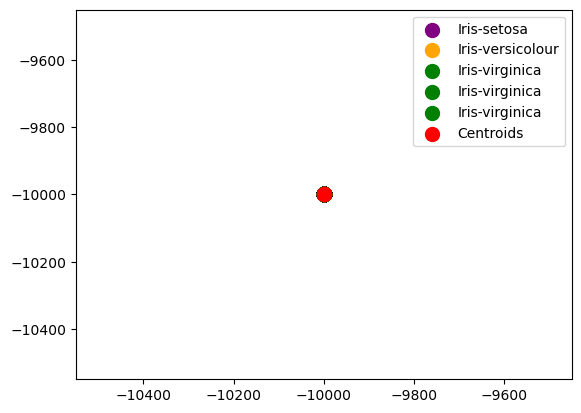

In [42]:
#Visualising the clusters
plt.scatter(data_for_clustering[y_kmeans == 0, 0], data_for_clustering[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_for_clustering[y_kmeans == 1, 0], data_for_clustering[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_for_clustering[y_kmeans == 2, 0], data_for_clustering[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 3, 0], data_for_clustering[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 4, 0], data_for_clustering[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [43]:
# Now, result_df has a new 'cluster' column indicating the assigned cluster for each row

# You can explore the clusters or perform further analysis
# For example, print the medoid indices for each cluster
medoid_indices = kmedoids.medoid_indices_
print("Medoid indices for each cluster:", medoid_indices)

# Optionally, you can visualize the clusters using scatter plots
# Assuming you want to visualize based on 'price1' and 'quantity1'
plt.scatter(result_df['price1'], result_df['quantity1'], c=result_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-medoids Clustering')
plt.xlabel('Price1')
plt.ylabel('Quantity1')
plt.show()


AttributeError: 'KMedoids' object has no attribute 'medoid_indices_'